In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.3


In [3]:
data=pd.read_csv('data/temperature.txt',delim_whitespace=True)
data

,Year,Annual_Mean,5-year_Mean
0,1882,-0.08,-0.16
1,1883,-0.19,-0.19
2,1884,-0.26,-0.22
3,1885,-0.30,-0.27
4,1886,-0.29,-0.27
...,...,...,...
129,2011,0.60,0.65
130,2012,0.63,0.67
131,2013,0.65,0.70
132,2014,0.74,*


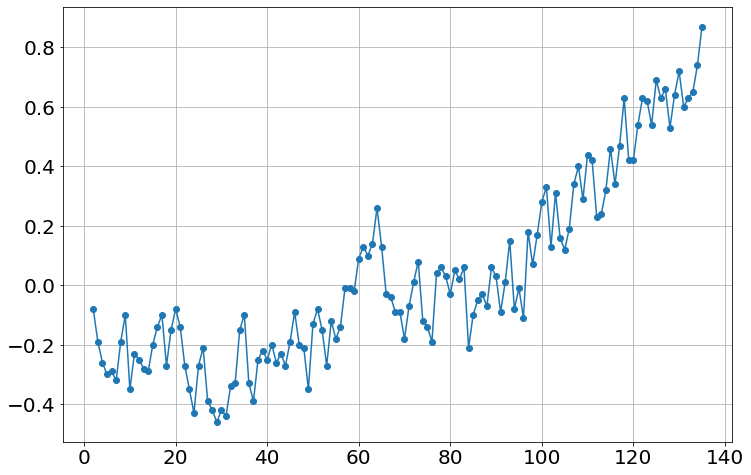

In [4]:
t=array(data['Year'])-1880
T=array(data['Annual_Mean'])
plot(t,T,'-o')

## Linear Regression

In [5]:
model=ols("y ~ x",data={'x':t,'y':T})
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     408.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           3.29e-42
Time:                        15:47:13   Log-Likelihood:                 59.766
No. Observations:                 134   AIC:                            -115.5
Df Residuals:                     132   BIC:                            -109.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4567      0.027    -16.656      0.000      -0.511      -0.402
x              0.0070      0.000     20.201      0.000       0.006       0.008
==============================================================================
Omnibus:                        5.219   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.953
Skew:                           0.129   Prob(JB):                        0.228
Kurtosis:                       2.320   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
results.params

Intercept   -0.456716
x            0.007041
dtype: float64

In [7]:
results.params.keys()

Index(['Intercept', 'x'], dtype='object')

In [8]:
slope=results.params['x']
slope_uncertainty=results.bse['x']
slope,slope_uncertainty

(0.007041060362348658, 0.00034855510290787185)

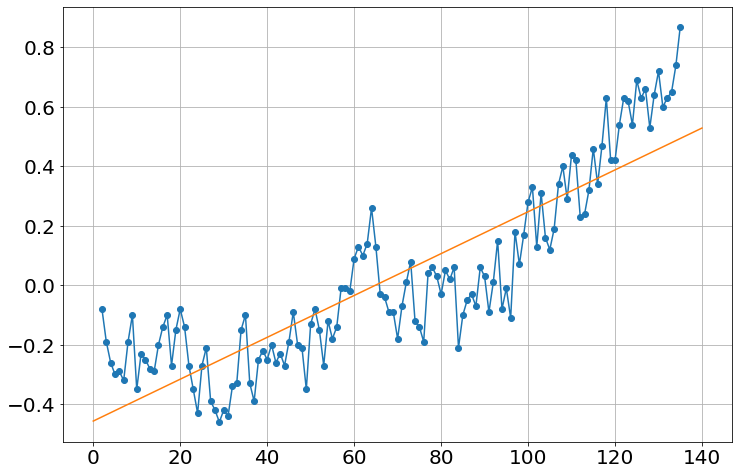

In [9]:
xx=linspace(0,140,100)
yy=results.predict({'x':xx})
plot(t,T,'-o')
plot(xx,yy)

## Quadratic

In [10]:
model=ols("y ~ x + I(x*x)",data={'x':t,'y':T})
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     423.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           6.80e-58
Time:                        15:47:21   Log-Likelihood:                 100.02
No. Observations:                 134   AIC:                            -194.0
Df Residuals:                     131   BIC:                            -185.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2081      0.031     -6.619      0.000      -0.270      -0.146
x             -0.0036      0.001     -3.417      0.001      -0.006      -0.002
I(x * x)    7.779e-05   7.49e-06     10.387      0.000     6.3e-05    9.26e-05
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.807
Skew:                           0.263   Prob(JB):                        0.405
Kurtosis:                       3.214   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
results.params

Intercept   -0.208095
x           -0.003616
I(x * x)     0.000078
dtype: float64

In [12]:
results.params.keys()

Index(['Intercept', 'x', 'I(x * x)'], dtype='object')

In [13]:
linear_parameter=results.params['x']
linear_parameter_uncertainty=results.bse['x']
linear_parameter,linear_parameter_uncertainty

(-0.003616323112834359, 0.0010582775309680118)

In [14]:
quadratic_parameter=results.params['I(x * x)']
quadratic_parameter_uncertainty=results.bse['I(x * x)']
quadratic_parameter,quadratic_parameter_uncertainty

(7.779112025680962e-05, 7.489558497634191e-06)

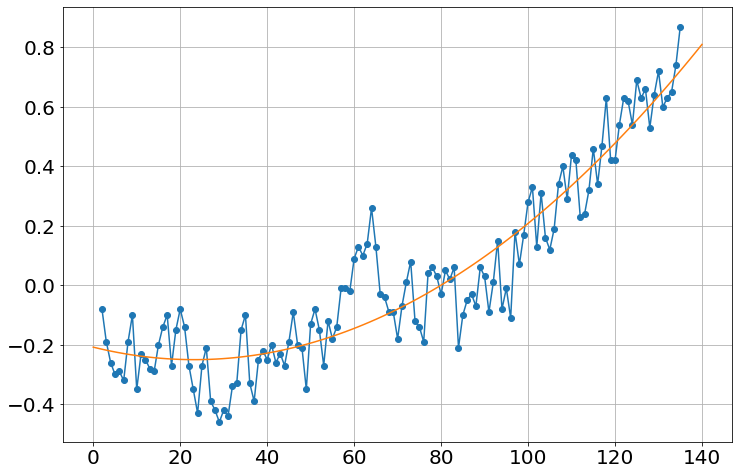

In [15]:
xx=linspace(0,140,100)
yy=results.predict({'x':xx})
plot(t,T,'-o')
plot(xx,yy)

In [16]:
results.bic

-185.3421042806147